In [20]:
library(MASS)
library(randomForest)
library(ggplot2)
library(caret)
library(grid)
library(corrplot)


In [34]:
# load the Boston dataset
data <- Boston
str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [35]:
#check dimension of the dataset
dim(data)

[1] 506  14

In [22]:
# see summary statistics of the dataset
summary(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [27]:
summary(data$medv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

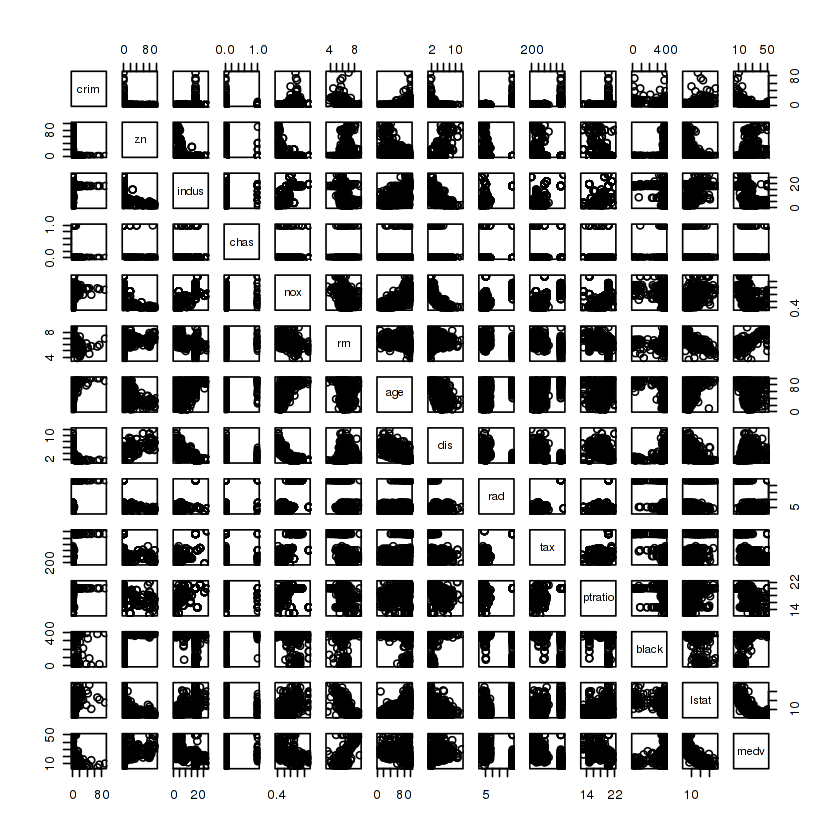

In [36]:
plot(data)

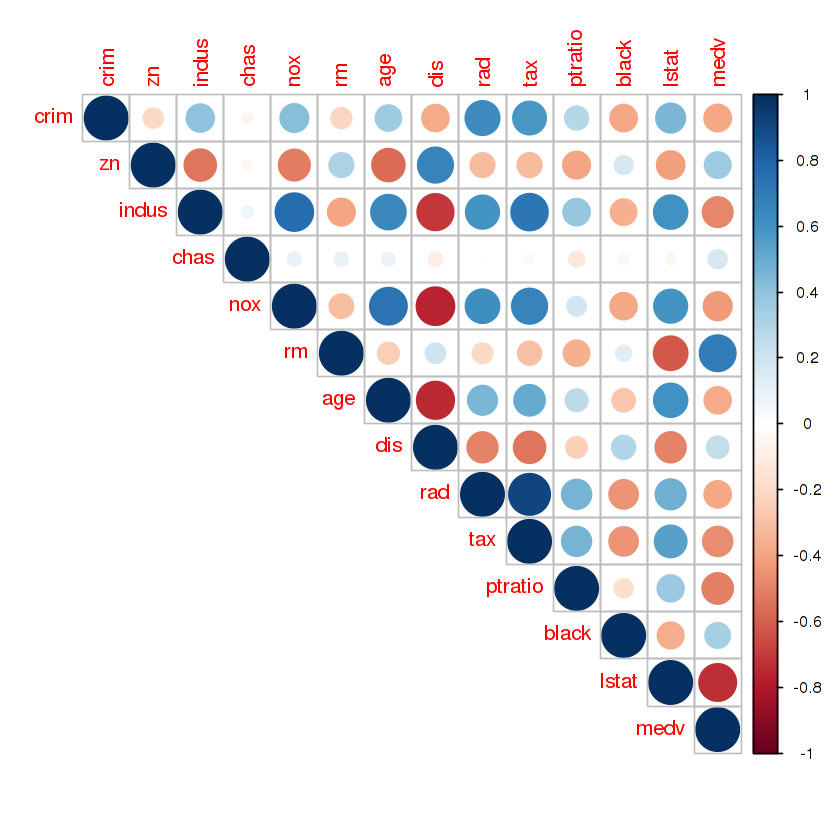

In [23]:
# check the correaltion 
correlation_matrix <- cor(data)
corrplot(correlation_matrix, type = "upper")

In [28]:

vars_to_normalize = c('crim', 'zn', 'indus', 'nox', 'rm','rad', 'age', 'dis', 'medv')
normalize = function(x){
  return (x - mean(x, na.rm=TRUE))/sd(x, na.rm=TRUE)
}


for (var in vars_to_normalize){
  data[[var]] = normalize(data[[var]])
}
set.seed(1337)

data["in_test"] = runif(nrow(data)) > .7

get_error = function(model, data){
  data["prediction"] = predict(model, newdata=data)
  return(mean(abs(data[["prediction"]] - data[["medv"]])))
}


In [29]:
# medv ~. is R shorthand for use medv as the response and all variables as covariates
rf1 = randomForest(medv ~., data = data, ntree = 50)
rf2 = randomForest(medv ~., data = data, ntree = 100)
rf3 = randomForest(medv ~., data = data, ntree = 250)
rf4 = randomForest(medv ~., data = data, ntree = 500)
rf5 = randomForest(medv ~., data = data, ntree = 1000)

In [30]:
get_error(rf1, data)


[1] 0.9732192

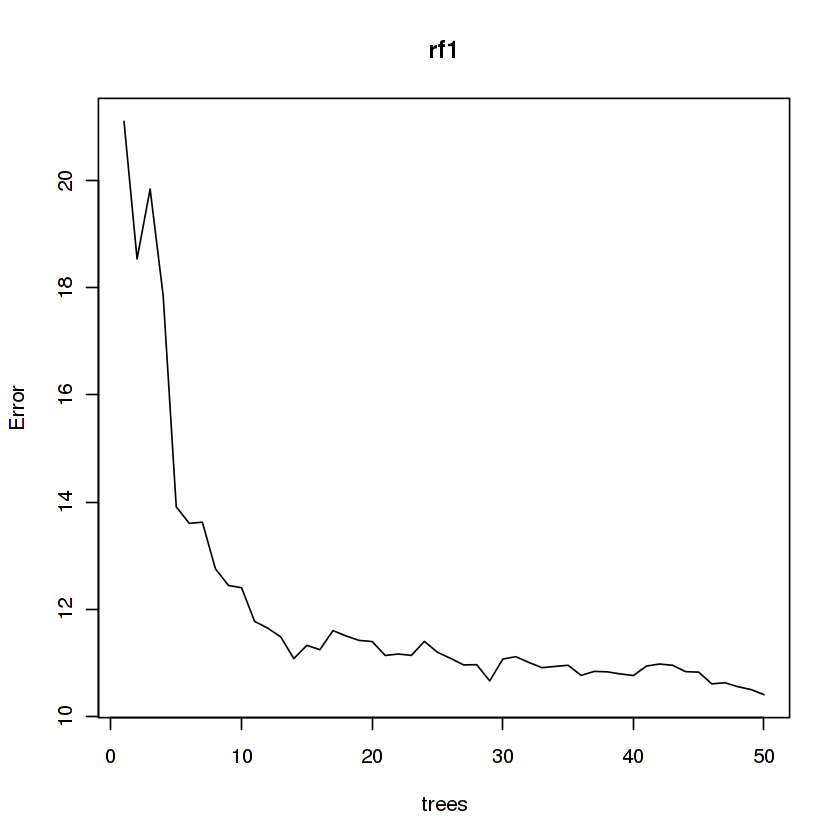

In [32]:
plot(rf1)

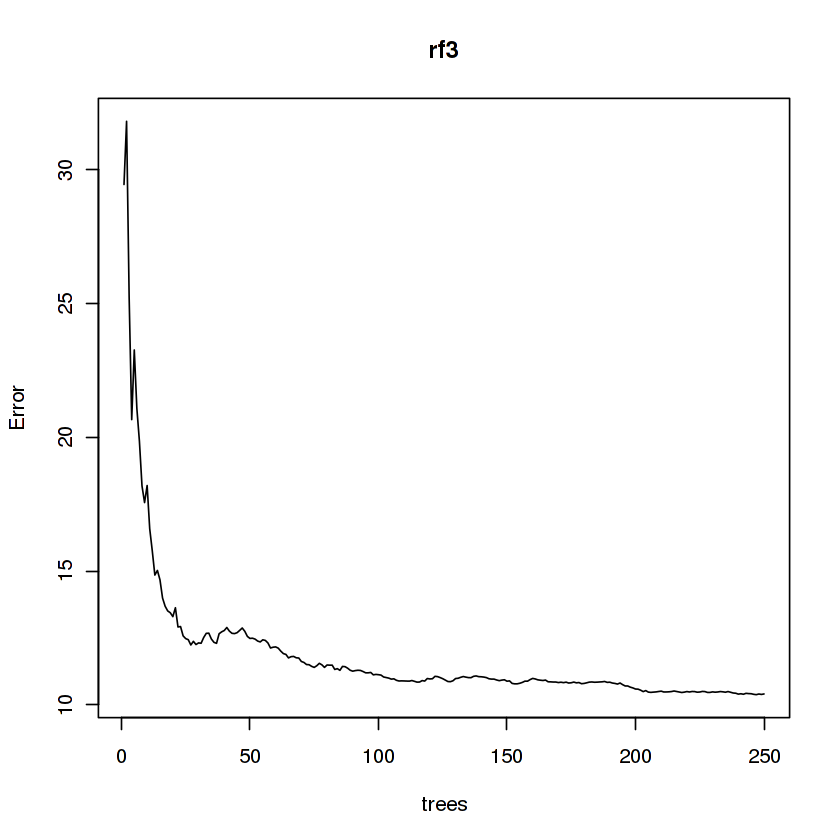

In [37]:
plot(rf3)

In [33]:
rf351 = randomForest(medv ~., data = data, ntree = 250, mtry=7, nodesize=3)
rf352 = randomForest(medv ~., data = data, ntree = 250, mtry=7, nodesize=5)
rf353 = randomForest(medv ~., data = data, ntree = 250, mtry=7, nodesize=7)
rf354 = randomForest(medv ~., data = data, ntree = 250, mtry=7, nodesize=9)
rf355 = randomForest(medv ~., data = data, ntree = 250, mtry=7, nodesize=11)
